In [24]:
import numpy as np
from sklearn.datasets import load_sample_image
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib notebook

In [16]:
#load the data
china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
batchsize, height, width, channels = dataset.shape

<IPython.core.display.Javascript object>


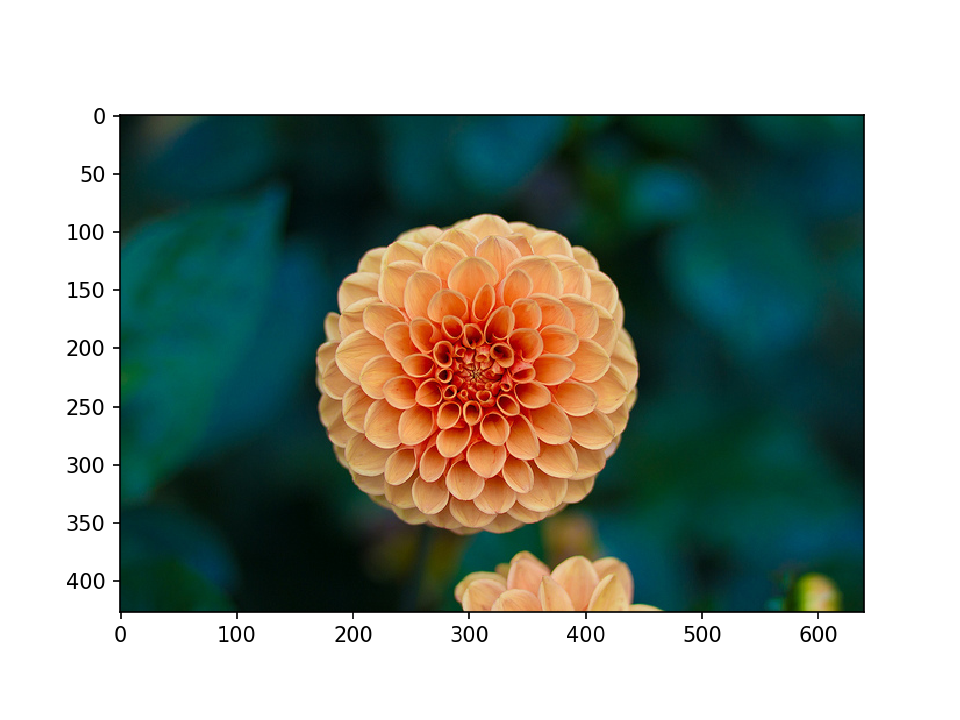

In [32]:
plt.imshow(flower, cmap="gray")
plt.show()

In [17]:
#create the filters
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)

filters[:, 3, :, 0] = 1 #vertical lines

filters[:, 3, :, 1] = 1 #horizontal lines

In [25]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1, 2, 2, 1], padding="SAME")

In [26]:
with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

<IPython.core.display.Javascript object>


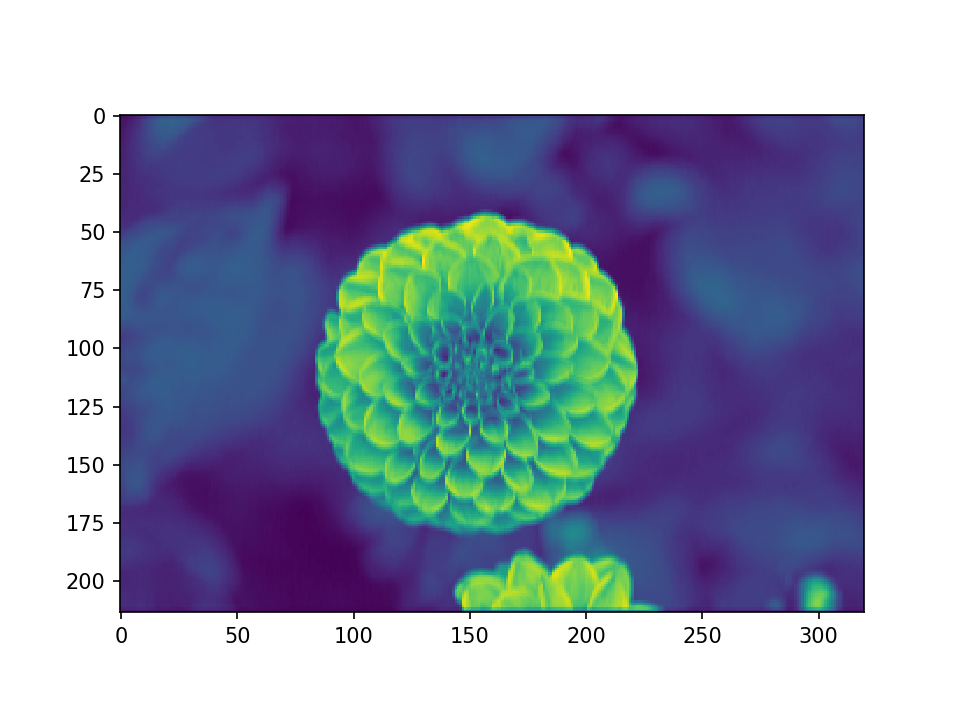

In [34]:
plt.imshow(output[1, :, :, 0])
plt.show()

### Exploring Pooling

In [21]:
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")

In [22]:
with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

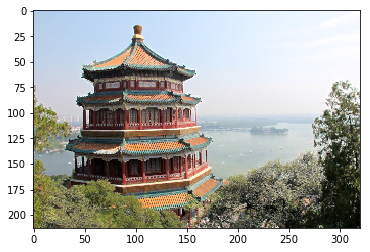

In [23]:
plt.imshow(output[0].astype(np.uint8))
plt.show()